# Multicollinearity

Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. This means that one independent variable can be predicted from another in a regression model.

Eg. Eating chips and watching television are highly correlated in the case of a person if the person starts eating chips when they watch television and this makes him happy

#####  Why is it problem?

- It becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately. That can be a problem when it comes to interpretability, though it doesnt directly impact accuracy.


- Multicollinearity can lead to unstable and unreliable coefficient estimates in regression analysis, making it harder to interpret the results and draw meaningful conclusions from the model.

    For example, let’s assume that in the following linear equation:

    Y = W0+W1*X1+W2*X2

    Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2, and we would not be able to see their individual effect on Y.

##### How to identify and address Multicollinearity?

When two variables have a correlation coefficient of either +1.0 or -1.0, they are considered perfectly collinear.

1. Detecting Multicollinearity Using a Variance Inflation Factor (VIF)


2. Correlation Matrix for independet variables


3. Regularization and Feature Selection





### Variance Inflation Factor

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. It is predicted by taking a variable and regressing it against every other variable. 

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

$R^2$ value is determined to find out how well an independent variable is described by the other independent variables.

**A high value of $R^2$ means that the variable is highly correlated with the other variables. Closer is $R^2$ to 1,  the higher the value of VIF and the higher the multicollinearity with the particular independent variable.**

$$
VIF_j = \frac{1}{1 - R_j^2}
$$

where,

$R_j^2$ is the $R^2$ obtained by regressing the j-th predictor variable $X_j$ against all other predictor variables.



- VIF starts at 1 and has no upper limit

- VIF = 1, no correlation between the independent variable and the other variables

- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.



In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    
    # Pass the column values and index of a column
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



## Fixing Multicollinearity:

1. Dropping correlated features:

X = df.drop(['Age','Years of Service'],axis=1)

Dropping variables should be an iterative process starting with the variable having the largest VIF value because other variables highly capture its trend. If you do this, you will notice that VIF values for other variables would have reduced

2. Next, combine the correlated variables into one and drop the others. This will reduce the multicollinearity.

df2 = df.copy()
df2['Age_at_joining'] = df.apply(lambda x: x['Age'] - x['Years of service'],axis=1)

# Coefficient of determination ($R^2$)


The coefficient of determination is the square of the **correlation coefficient**, also known as "r" in statistics. The value "r" can result in a negative number,

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

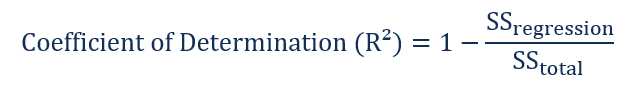

Where:

$SS_{regression}$ – The sum of squares due to regression (explained sum of squares)

$SS_{total}$ –  The total sum of squares

It assesses how strong the linear relationship is between two variables and is heavily relied on by investors when conducting trend analysis.

**The coefficient of determination is used to explain the relationship between an independent and dependent variable.** This measure is represented as a value between 0.0 and 1.0, where a value of 1.0 indicates a perfect correlation.

#### Interpretation of the Coefficient of Determination (R²)

1. It does not indicate the correctness of the regression model.


2. It is a measure of the goodness of fit of a model The most common interpretation of the coefficient of determination is how well the regression model fits the observed data. **A higher coefficient indicates a better fit for the model.**

#### References:

1. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
2. https://www.investopedia.com/terms/c/coefficient-of-determination.asp
3. https://corporatefinanceinstitute.com/resources/data-science/coefficient-of-determination/